In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('bmi.csv')
print(df.shape)
df.head()

(741, 5)


,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2


In [4]:
df.describe()

,Age,Height,Weight,Bmi
count,741.000000,741.000000,741.000000,741.000000
mean,31.618084,1.709427,78.412497,26.365427
std,11.655466,0.085974,32.254547,9.223191
min,15.000000,1.460000,25.900000,12.150497
25%,22.000000,1.670000,63.000000,22.129740
50%,29.000000,1.721000,72.900000,24.132412
75%,40.000000,1.751000,83.300000,27.249306
max,61.000000,2.070000,270.000000,66.301350


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB


In [11]:
df.isna().sum()

Age         0
Height      0
Weight      0
Bmi         0
BmiClass    0
dtype: int64

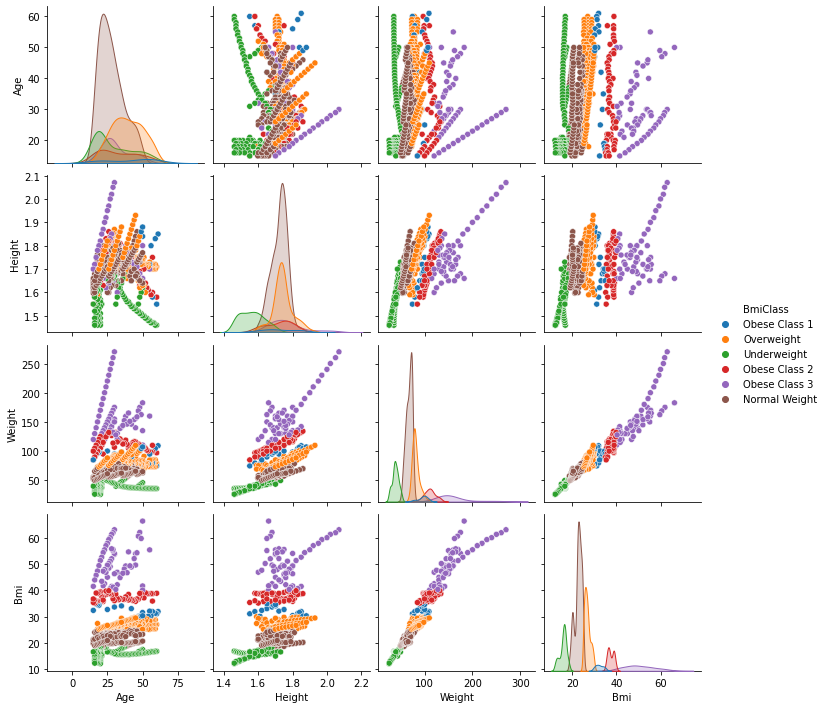

In [12]:
sns.pairplot(df, hue='BmiClass')

In [16]:
X = df[df.columns[:-1]]

In [19]:
X.head(), X.shape

(   Age  Height  Weight        Bmi
 0   61    1.85  109.30  31.935720
 1   60    1.71   79.02  27.023700
 2   60    1.55   74.70  31.092612
 3   60    1.46   35.90  16.841809
 4   60    1.58   97.10  38.896010,
 (741, 4))

In [22]:
Y = df["BmiClass"]
Y.head(), Y.shape

(0    Obese Class 1
 1       Overweight
 2    Obese Class 1
 3      Underweight
 4    Obese Class 2
 Name: BmiClass, dtype: object,
 (741,))

In [24]:
categories = df["BmiClass"].unique()
categories

array(['Obese Class 1', 'Overweight', 'Underweight', 'Obese Class 2',
       'Obese Class 3', 'Normal Weight'], dtype=object)

In [25]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=27)

In [26]:
#Creating Decision Tree Classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [31]:
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test,y_pred, average="macro"))

Accuracy:  0.9932885906040269
F1 Score:  0.9835294117647059


In [37]:
y_test = np.array(y_test)
print("y_test shape", y_test.shape)

y_test shape (149,)


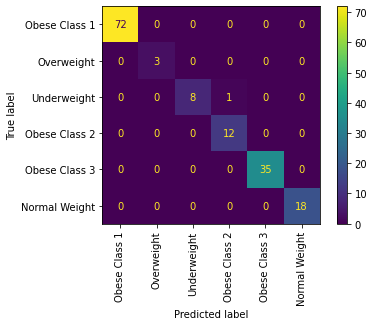

In [56]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm(y_test, y_pred), display_labels=categories)
disp.plot(xticks_rotation='vertical')

In [ ]:
#From this Heatmap we can see that the decision tree classifier was able to predict the BMI class with a very high accuracy
#only missing 1 prediction in the Underwight classs classifying it as Obese Class 2, not completely sure wy thius discrepancy occurs
#but digging into the data more may reveal a typo or a bad piece of data in the dataset.